In [26]:
import pandas as pd

# Load the dataset from your MySQL Uploads folder
df = pd.read_csv(r"C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/Asian_countries_by_population.csv")



In [27]:
df.head()


,Rank,Country / dependency,% Asia,Asian population,Total population,% growth,Official figure,Official date
0,1.0,India,29.9%,"1,464,671,352","1,465,671,352",0.0%,"1,409,670,000",14 Dec 2025[2]
1,2.0,China,29.9%,"1,429,627,563","1,428,627,663",0.8%,"1,388,163,000",1 Jul 2023[3]
2,3.0,Indonesia,5.7%,"272,096,348","277,534,123",0.7%,"277,749,853",31 Dec 2022[4]
3,4.0,Pakistan,5.0%,"240,485,658","240,485,658",2.5%,"241,499,431",2023[6]
4,5.0,Bangladesh,3.6%,"172,954,319","172,954,319",1.0%,"169,828,911",15 Jun 2022[7]


In [28]:
df.columns.tolist()

['Rank',
 'Country / dependency',
 '% Asia',
 'Asian population',
 'Total population',
 '% growth',
 'Official figure',
 'Official date']

In [29]:
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(" ", "_")
              .str.replace("/", "_")
              .str.replace("%", "percent")
)


In [30]:
df.columns.tolist() 

['rank',
 'country___dependency',
 'percent_asia',
 'asian_population',
 'total_population',
 'percent_growth',
 'official_figure',
 'official_date']

In [31]:
df = df.rename(columns={"country___dependency": "country_dependency"})


In [32]:
df.columns.tolist()

['rank',
 'country_dependency',
 'percent_asia',
 'asian_population',
 'total_population',
 'percent_growth',
 'official_figure',
 'official_date']

In [33]:
def clean_number(x):
    if pd.isna(x):
        return None
    x = str(x).replace(",", "").replace('"', "").strip()
    return pd.to_numeric(x, errors="coerce")

numeric_cols = [
    "rank",
    "asian_population",
    "total_population",
    "official_figure"
]

for col in numeric_cols:
    df[col] = df[col].apply(clean_number)


In [34]:
df.head()

,rank,country_dependency,percent_asia,asian_population,total_population,percent_growth,official_figure,official_date
0,1.0,India,29.9%,1464671352,1465671352,0.0%,1409670000,14 Dec 2025[2]
1,2.0,China,29.9%,1429627563,1428627663,0.8%,1388163000,1 Jul 2023[3]
2,3.0,Indonesia,5.7%,272096348,277534123,0.7%,277749853,31 Dec 2022[4]
3,4.0,Pakistan,5.0%,240485658,240485658,2.5%,241499431,2023[6]
4,5.0,Bangladesh,3.6%,172954319,172954319,1.0%,169828911,15 Jun 2022[7]


In [35]:
def clean_percent(x):
    if pd.isna(x):
        return None
    x = str(x).replace("%", "").strip()
    return pd.to_numeric(x, errors="coerce")

df["percent_asia"] = df["percent_asia"].apply(clean_percent)
df["percent_growth"] = df["percent_growth"].apply(clean_percent)


In [36]:
df.head()

,rank,country_dependency,percent_asia,asian_population,total_population,percent_growth,official_figure,official_date
0,1.0,India,29.9,1464671352,1465671352,0.0,1409670000,14 Dec 2025[2]
1,2.0,China,29.9,1429627563,1428627663,0.8,1388163000,1 Jul 2023[3]
2,3.0,Indonesia,5.7,272096348,277534123,0.7,277749853,31 Dec 2022[4]
3,4.0,Pakistan,5.0,240485658,240485658,2.5,241499431,2023[6]
4,5.0,Bangladesh,3.6,172954319,172954319,1.0,169828911,15 Jun 2022[7]


In [21]:
print(df.dtypes)
print(df.head())


Rank                    float64
Country / dependency     object
% Asia                   object
Asian population        float64
Total population         object
% growth                 object
Official figure          object
Official date            object
dtype: object
   Rank Country / dependency % Asia  Asian population Total population  \
0   1.0                India  29.9%      1.464671e+09    1,465,671,352   
1   2.0                China  29.9%      1.429628e+09    1,428,627,663   
2   3.0            Indonesia   5.7%      2.720963e+08      277,534,123   
3   4.0             Pakistan   5.0%      2.404857e+08      240,485,658   
4   5.0           Bangladesh   3.6%      1.729543e+08      172,954,319   

  % growth Official figure   Official date  
0     0.0%   1,409,670,000  14 Dec 2025[2]  
1     0.8%   1,388,163,000   1 Jul 2023[3]  
2     0.7%     277,749,853  31 Dec 2022[4]  
3     2.5%     241,499,431         2023[6]  
4     1.0%     169,828,911  15 Jun 2022[7]  


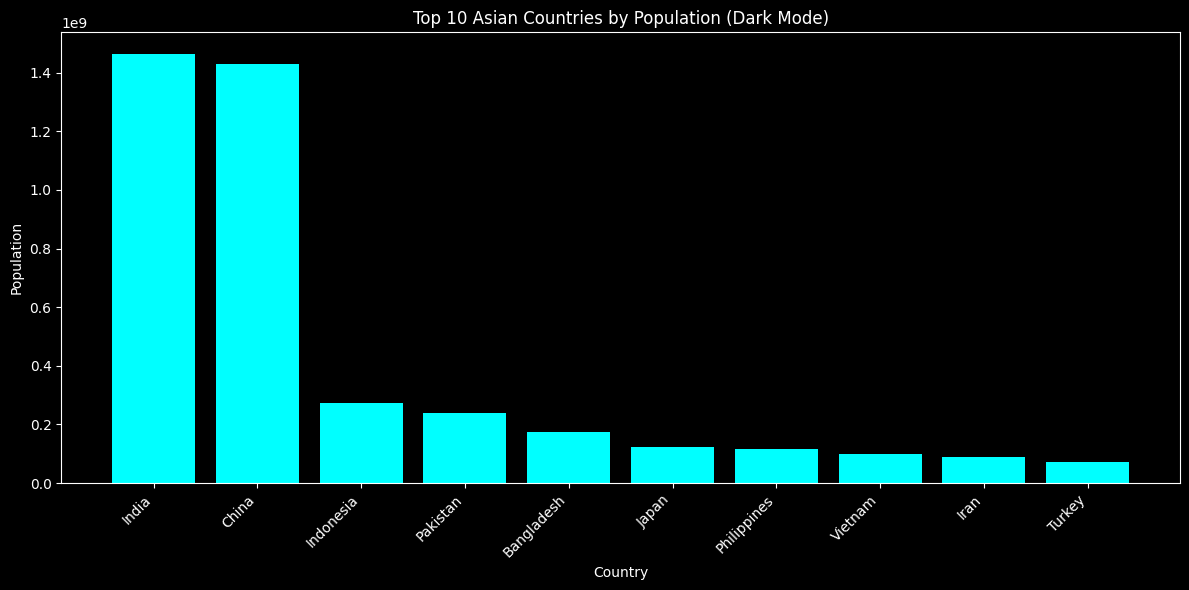

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Dark background
plt.style.use("dark_background")

# Load dataset
df = pd.read_csv(r"C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/Asian_countries_by_population.csv")

# Clean Asian population for plotting
df["Asian population"] = (
    df["Asian population"]
    .astype(str)
    .str.replace(",", "")
    .astype(float)
)

# Select top 10
top10 = df.nlargest(10, "Asian population")

# Plot
plt.figure(figsize=(12, 6))
plt.bar(top10["Country / dependency"], top10["Asian population"], color="cyan")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Asian Countries by Population (Dark Mode)")
plt.xlabel("Country")
plt.ylabel("Population")
plt.tight_layout()
plt.show()


In [23]:
df.to_csv(
    r"C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/Asian_countries_by_population_clean.csv",
    index=False
)


In [24]:
df.head(30).to_csv(
    r"C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/Asian_countries_by_population_first_30_rows.csv",
    index=False
)


In [25]:
df.columns.tolist()

['Rank',
 'Country / dependency',
 '% Asia',
 'Asian population',
 'Total population',
 '% growth',
 'Official figure',
 'Official date']

In [37]:
df.head()


,rank,country_dependency,percent_asia,asian_population,total_population,percent_growth,official_figure,official_date
0,1.0,India,29.9,1464671352,1465671352,0.0,1409670000,14 Dec 2025[2]
1,2.0,China,29.9,1429627563,1428627663,0.8,1388163000,1 Jul 2023[3]
2,3.0,Indonesia,5.7,272096348,277534123,0.7,277749853,31 Dec 2022[4]
3,4.0,Pakistan,5.0,240485658,240485658,2.5,241499431,2023[6]
4,5.0,Bangladesh,3.6,172954319,172954319,1.0,169828911,15 Jun 2022[7]


In [38]:
df.to_csv(
    r"C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/Asian_countries_by_population_clean.csv",
    index=False
)
